# Assignment 2, task 3
**Xijia Liu, Umeå University**

## Task 3: The soul of deep learning, gradient

**Background**: deep learning has obtained great success, however, it still has many issues that are unclear. Proper optimization methods to solve the non-convex problem in deep learning is still an open question. In fact, we are empirically using some brute force methods to find the optimal parameter estimation in almost all deep learning applications. In those brute force methods, gradient and its calculation play a key role and therefore it is the soul of deep learning.

**Task description**: in this task, we investigate the inner working mechanism of Tensorflow. A BIG remark first. Different from the previous task, We will try to get rid of the bondage of Keras, bypass the "model compile -> model training" routine, and use the gradient calculation function of Tensorflow to implement the gradient descent algorithm through our own code.

There will be 3 subtasks. First, we learn how to calculate the gradient in Tensorflow. Second, implement the Gradient descent algorithm to a simple numerical problem. Third, apply the Gradient descent algorithm to learn a simple linear regression model. 

###Task 3.1 Understand gradient and its calculation in TF

I am from Umeå and skiing is one of our daily basic survival skills. I learned downhill ski through the theory of gradient. So, let's understand gradient by the following gif pitcure.

![picture](https://j.gifs.com/y72Q7Y.gif)

1. Gradient is a generalization of derivative for a scalar-valued multivariable function.
2. Consider $z = f(x, y)$, gradient (vector) of function $z$ is a 2-dim vector of partial derivatives of each varaible. 
3. $ \nabla f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})^{\top}$
4. The opposite direction of a gradient vector points to the direction of steepest descent. 

Next, we learn how to evaluate the gradient vector of a multivariable function at certain point. Suppose we want to use tensorflow to calculate the derivative of function 
$$
  f(x) = 2x^2 + 3x + 1
$$ 
at $x_0 = 3$. The derivative can be easily calculated as $f'(x_0) = 4x_0+3 = 15$. How does TF handle this trivial example? Let's see the following code.

In [2]:
import tensorflow as tf #import TF moudle

In [2]:
x_0 = 3.
x = tf.Variable(x_0)
with tf.GradientTape() as tape:
  f = 2*x**2+3*x+1
grad = tape.gradient(f, x)
print('the derivative is ', float(grad))

the derivative is  15.0


The first important thing for evaluating gradient in TensforFlow is define a TensorFlow variable, for example, line 2. Then we can apply function 'GradientTape()' to evaluate the gradient for a function. Here, we can sue Python 'with-as' syntax to define the function and evaluate its gradient efficiently.  

**Now, it is your turn.** Can you write a few of lines code to calculate the gradient vector of a function of three variables? 
$$f(x,y,z) = x^3 + 3y^3 + 2z^3 + 2x^2y + 3xyz $$The gradient is $$ \nabla f = \begin{pmatrix}
3x^2+4xy+3yz\\ 
9y^2+2x^2+3xz\\ 
6z^2+3xy
\end{pmatrix} $$
Then your task is apply TF's functions to evaluate the gradient at $(x,y,z)^{T} = (2,4,1)^{T}$.

**Tips**: you need to define three tensorflow variables and put them in a array '[x,y,z]' when you apply function 'tape.gradient()' to evaluate the gradient. 

In [24]:
x1 = tf.Variable(2.)
y = tf.Variable(4.)
z = tf.Variable(1.)

x = [x1,y,z]

with tf.GradientTape() as tape:
  f = x[0]**3 + 3*x[1]**3 + 2*x[2]**3 + 2*x[0]**2*x[1] + 3*x[0]*x[1]*x[2]

grad = tape.gradient(f,x)


print(f'[{float(grad[0])},{float(grad[1])},{float(grad[2])}]')

[56.0,158.0,30.0]


### Task 3.2 Gradient descent algorithm

Since the negative gradient vector points to the direction of the steepest 
Suppose we want to minimize an objective function $f(\textbf{w})$. Since the negative gradient vector, $\nabla f(\textbf{w})$, points to the direction of the steepest descent of the objective function, it provides us an idea for finding the minimum value of an objective function. We start from an initial value of the optimizing variable and evaluate the gradient vector at this point, then update the optimizing variable toward the negative gradient direction with a small step, i.e. 
$$
\textbf{w}_{t+1} = \textbf{w}_{t} - \alpha \nabla f(\textbf{w}_t)
$$ 
Repeat this procedure many times, then we can find the minimiaer. A one dimensional and a two dimensional example are displayed below.

![picture](https://hackernoon.com/hn-images/1*ZmzSnV6xluGa42wtU7KYVA.gif)
![picture](https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif)

**Example**: suppose we want to find the minimum value of function $f(x) = x^2-5x-1$ and the minimizer. We can implement the Gradient descent alogrithm as the following code 

In [41]:
lr = 0.1
x = tf.Variable(0, name="variable", dtype=tf.float32)
for i in range (30):
  with tf.GradientTape() as tape:
    f = x**2-5*x-1
  grads = tape.gradient(f, x)
  x.assign_sub(lr*grads)
print(float(x))

2.4969050884246826


**Remarks**: 
1. To verify the results, we can find the minimizer by calculating the partial derivative and find the stationary point
$$
  f'(x) = 2x-5 = 0
$$
The minimizer is $2.5$
2. In the code, line 6, it is the way to update a variable in TensorFlow. Method '.assign_sub' means update 'x' by substract it by 'lr*grads'. You may guess how to update 'x' if we set 'lr = -0.1'
3. You also can play this code with different learning rate and summarize the effects of learning rate.

**Now, it is your turn.** In this subtask, you need to write a program to find the minimizer of a bivariable objective function 
  $$
    f(x,y) = (x-1)^2+0.5(y-3)^2
  $$
**Tips**: 
1. You can use a while loop with an approximation threshold value, or just simply use a for loop, to find minimizer.
2. The initial value can be set as $(x,y)^{\top} = (0,0)^{\top}$ and you can choose a proper learning rate.

In [24]:
lr = 0.1
x =  tf.Variable([1.0,0.0], dtype=tf.float32)
print(x[0].numpy())

for i in range(100):
    with tf.GradientTape() as tape:
        f = (x[0] - 1)**2 + 0.5*(x[1]-3)**2 
    grads = tape.gradient(f,x)
    x.assign_sub(lr*grads)
    
print(x.numpy())




1.0
[1.        2.9999204]


###Task 3.3 Estimate regression coefficients by Gradient Descent algorithm 

In this subtask, we apply Gradient descent algorithm to find the least sqaure estimation of regression coefficients. First, let's import some useful tools to our working space.

In [25]:
from matplotlib import pyplot as plt
from tensorflow.keras import layers, Sequential, optimizers

We prepare the data by the following code. 

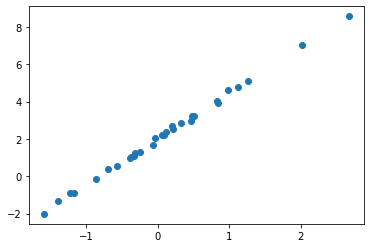

In [26]:
n = 30
b0 = 2
b1 = 2.5
x = tf.random.normal([n,1])
error = tf.random.normal([n,1], 0, 0.1)
y = b0 + b1*x + error
plt.scatter(x.numpy(), y.numpy(), marker='o')

The problem is estimating the regression coefficients from the simulated data using Gradient Descent algorithm. The first thing is write down the objective function and it is the mean square loss
  $$
    \frac{1}{n}\sum_{i=1}^n(y_i - f(x_i))^2
  $$
where $f(x_i)$ is the regression model. The model we will apply Keras 'Sequential' function, see the codes below. We can see that simple regression model is a special case of a regression Artificial neural network.

**The first task of Task 3.3:**

In the follwing chunk, you need to write proper codes to complete the defintion of 'model'.

In [ ]:
model = Sequential([
  # you need to write the code to complete the model
])
model.summary()

**The second task of Task 3.3**: 

Now we are ready to implement the Gradient descent algorithm to estimate the regression coefficients. As you can see in the follwing chunck, the code is almost there, but you need to write the line 5 by yourself. 

**Tips**: In TensorFlow, for the square and mean operator, you can call function 'tf.square' and 'tf.reduce_mean'. 

In [ ]:
lr = 0.1
opt = optimizers.SGD(learning_rate=lr)
for i in range(30):
  with tf.GradientTape() as tape:
    # you need to write the code. 
  grads = tape.gradient(loss, model.trainable_variables)
  opt.apply_gradients(zip(grads, model.trainable_variables))
  print(loss)
print('b0:', model.layers[0].bias.numpy())
print('b1:', model.layers[0].kernel.numpy())

**The third task of Task 3.3**:

As you can see that we use build-in optimization solver in TensorFlow to implement the Gradient Descent algorithm in line 8. Nest, you need to write your own code to replace the 8th line.

**Tips**: 
1. In TensorFlow, the model parameters are stored in different layers. In this case, the slope coefficient is stored in 'model.layers[0].kernel' and the intercept term can be found in 'model.layers[0].bias'. As you can see, in TensorFlow, the weights for each neuron is called 'kernel'. 
2. Both 'model.layers[0].kernel' and 'model.layers[0].bias' are TensorFlow variables and they have method '.assign_sub' as the example in Task 4.2.